In [2]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
import gymnasium as gym
from stable_baselines3 import DQN
import numpy as np
import matplotlib.pyplot as plt

In [4]:
env = gym.make('FrozenLake-v1', render_mode='human', is_slippery=False)

model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=50)

episode_rewards = []
num_episodes = 10
max_steps = 50

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5.5      |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2        |
|    time_elapsed     | 7        |
|    total_timesteps  | 22       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.12     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3        |
|    time_elapsed     | 15       |
|    total_timesteps  | 49       |
----------------------------------


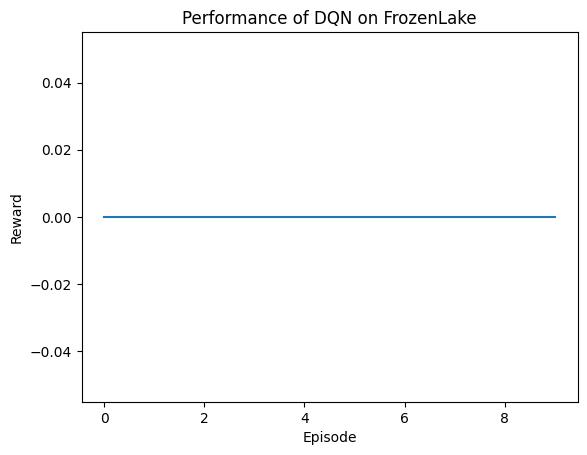

In [5]:
for episode in range(num_episodes):
    obs, _info = env.reset()
    done = False
    total_reward = 0
    steps = 0
    while not done and steps < max_steps:
        action, _states = model.predict(obs, deterministic=True)
        action = int(action)
        obs, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        done = terminated or truncated
        steps += 1
    episode_rewards.append(total_reward)

plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Performance of DQN on FrozenLake')
plt.show()

In [6]:
total_reward = 0
done = False
obs, _info = env.reset()

while not done:
    action, _states = model.predict(obs, deterministic=True)
    action = int(action)
    obs, reward, terminated, truncated, _ = env.step(action)
    total_reward += reward
    done = terminated or truncated

print(f"Total reward after running the learned policy: {total_reward}")

Total reward after running the learned policy: 0.0
